<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [266]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

# for webscrapping
import bs4
import requests
import os
import time
import csv

## 1) *Optional:* Scrape 100 Job Listings that contain the title "Data Scientist" from indeed.com

At a minimum your final dataframe of job listings should contain
- Job Title
- Job Description

If you choose to not to scrape the data, there is a CSV with outdated data in the directory. Remeber, if you scrape Indeed, you're helping yourself find a job. ;)

In [269]:
pages = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

with open('C:/Users/Lenovo/DS-Unit-4-Sprint-1-NLP/module2-vector-representations/data_scientist_jobs.csv', 'a', encoding='utf-8', newline='') as f_output:
    csv_print = csv.writer(f_output)
    
    file_is_empty = os.stat('C:/Users/Lenovo/DS-Unit-4-Sprint-1-NLP/module2-vector-representations/data_scientist_jobs.csv').st_size == 0
    if file_is_empty:
        csv_print.writerow(['Job Title', 'Company', 'Location', 'Summary'])
        
    # get data from url
    for page in pages:
        source = requests.get('https://www.indeed.com/jobs?q=data+scientist&l=San+Francisco%2C+CA&fromage=15&radius=25&start={}'.format(page)).text

        soup = BeautifulSoup(source, 'html.parser')
        # print(soup.prettify())

        for jobs in soup.find_all(class_='result'):
        #     print(jobs.prettify())
        #     print('------------')

            try:
                job_title = jobs.a.text.strip()
            except Exception as e:
                job_title = None
#             print('Job Title', job_title)
    
            try:
                company = jobs.span.text.strip()
            except Exception as e:
                company = None
#             print('Company', company)
    
            try:
                location = jobs.find('div', class_='location accessible-contrast-color-location').text.strip()
            except Exception as e:
                location = None
#             print('Location', location)
    
            try:
                summary = jobs.find('div', class_='summary').text.strip()
            except Exception as e:
                summary = None
#             print('Summary', summary)
            
            csv_print.writerow([job_title, company, location, summary])


# jobs = soup.find(class_='result')
# print(jobs.prettify())

# job_title = jobs.a.text.strip()
# print(job_title)

# company = jobs.span.text.strip()
# print(company)

# location = jobs.find('div', class_='location accessible-contrast-color-location').text.strip()
# print(location)

# summary = jobs.find('div', class_='summary').text.strip()
# print(summary)

In [270]:
df_scrapping = pd.read_csv('data_scientist_jobs.csv')
df_scrapping.head()

,Job Title,Company,Location,Summary
0,Data Scientist II,Genentech Pro Unlimited,"Millbrae, CA 94030",Work closely with project pilot team to apply ...
1,NaN,Jobot,"San Francisco, CA 94107 (South Of Market area)",Strong experience with SQL and scientific comp...
2,Data Scientist - Health Care,Jobot,"Emeryville, CA 94608",Data Scientist - Cutting Edge Health Care Star...
3,Data Scientist II,Kelly Services,"South San Francisco, CA 94080",Work closely with project pilot team to apply ...
4,Data Scientist,Woodruff Sawyer,NaN,The members of this team will work closely wit...


## 2) Use Spacy to tokenize / clean the listings 

In [209]:
df = pd.read_csv('./data/job_listings.csv')
df.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [210]:
# checking shape
df.shape

(426, 3)

In [211]:
df['description']

0      b"<div><div>Job Requirements:</div><ul><li><p>...
1      b'<div>Job Description<br/>\n<br/>\n<p>As a Da...
2      b'<div><p>As a Data Scientist you will be work...
3      b'<div class="jobsearch-JobMetadataHeader icl-...
4      b'<ul><li>Location: USA \xe2\x80\x93 multiple ...
                             ...                        
421    b"<b>About Us:</b><br/>\nWant to be part of a ...
422    b'<div class="jobsearch-JobMetadataHeader icl-...
423    b'<div class="jobsearch-JobMetadataHeader icl-...
424    b"<p></p><div><p>SENIOR DATA SCIENTIST</p><p>\...
425    b'<div></div><div><div><div><div><p>Cerner Int...
Name: description, Length: 426, dtype: object

In [212]:
X = df.description
df['description'] = [BeautifulSoup(X).getText() for X in df['description']]
df.head()

,Unnamed: 0,description,title
0,0,"b""Job Requirements:\nConceptual understanding ...",Data scientist
1,1,"b'Job Description\n\nAs a Data Scientist 1, yo...",Data Scientist I
2,2,b'As a Data Scientist you will be working on c...,Data Scientist - Entry Level
3,3,"b'$4,969 - $6,756 a monthContractUnder the gen...",Data Scientist
4,4,b'Location: USA \xe2\x80\x93 multiple location...,Data Scientist


In [213]:
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

In [214]:
def tokenizer(text):

    """ create tokenizer w/o stopwords, punctuation and spaces"""
    doc=nlp(text)
    
    return([token.lemma_ for token in doc if (token.is_stop != True) and (token.is_punct != True)])

In [215]:
df['tokens'] = df['description'].apply(tokenizer)

In [216]:
df['tokens']

0      [b"Job, requirements:\nconceptual, understandi...
1      [b'Job, description\n\na, Data, scientist, 1, ...
2      [b'As, Data, scientist, work, consult, busines...
3      [b'$4,969, $, 6,756, monthcontractunder, gener...
4      [b'Location, USA, \xe2\x80\x93, multiple, loca...
                             ...                        
421    [b"About, Us:\nWant, fantastic, fun, startup, ...
422    [b'InternshipAt, Uber, ignite, opportunity, se...
423    [b'$200,000, $, 350,000, yearA, million, peopl...
424    [b"SENIOR, DATA, SCIENTIST\nJOB, description\n...
425    [b'Cerner, Intelligence, new, innovative, orga...
Name: tokens, Length: 426, dtype: object

In [217]:
','.join(str(s) for s in df['tokens'][0])

'b"Job,requirements:\\nconceptual,understanding,Machine,Learning,model,like,nai\\xc2\\xa8ve,Bayes,K,Means,SVM,Apriori,Linear/,Logistic,Regression,neural,Random,Forests,decision,Trees,K,NN,hand,experience,2,them\\nintermediate,expert,level,coding,skill,Python,R.,ability,write,function,clean,efficient,datum,manipulation,mandatory,role)\\nexposure,package,like,NumPy,SciPy,Pandas,Matplotlib,etc,Python,GGPlot2,dplyr,tidyR,R\\nAbility,communicate,Model,finding,Technical,Non,technical,stake,holders\\nhand,experience,SQL,Hive,similar,programming,language\\nmust,past,work,GitHub,Kaggle,publish,article\\nmaster,degree,Statistics,Mathematics,Computer,Science,quant,specific,field.\\napply'

In [218]:
t=0
for token in df['tokens']:
    token = ','.join(str(s) for s in token)
    df['tokens'][t] = token
    t += 1
#     print (token)

C:\Users\Lenovo\Anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [219]:
df.head()

,Unnamed: 0,description,title,tokens
0,0,"b""Job Requirements:\nConceptual understanding ...",Data scientist,"b""Job,requirements:\nconceptual,understanding,..."
1,1,"b'Job Description\n\nAs a Data Scientist 1, yo...",Data Scientist I,"b'Job,description\n\na,Data,scientist,1,help,b..."
2,2,b'As a Data Scientist you will be working on c...,Data Scientist - Entry Level,"b'As,Data,scientist,work,consult,business,resp..."
3,3,"b'$4,969 - $6,756 a monthContractUnder the gen...",Data Scientist,"b'$4,969,$,6,756,monthcontractunder,general,su..."
4,4,b'Location: USA \xe2\x80\x93 multiple location...,Data Scientist,"b'Location,USA,\xe2\x80\x93,multiple,locations..."


In [220]:
# removing x values as x80 and xe2 using regex
df['tokens'] = df['tokens'].apply(lambda x: re.sub(r'\\x', '', x))

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [221]:
# create the transformer
vector = CountVectorizer(stop_words='english')

# learn vocab
vector.fit(df['tokens'])

# transform text
dtm = vector.transform(df['tokens'])


# print(vector.get_feature_names())
dtm = pd.DataFrame(dtm.todense(), columns=vector.get_feature_names())

# show df head
dtm.head()

,00,000,02115,03,0356,04,062,06366,08,10,...,zero,zeus,zf,zfe28099s,zheng,zillow,zones,zoom,zuckerberg,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

In [222]:
# word count
dtm.sum().sort_values(ascending=False)[:20]

datum          2611
data           1766
work           1406
experience     1328
team           1286
business       1245
science         963
product         835
analysis        784
model           751
scientist       698
machine         693
learning        676
nexperience     618
statistical     566
analytic        558
build           554
opportunity     544
include         539
help            539
dtype: int64

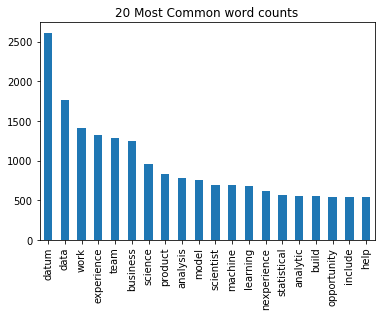

In [223]:
# word count
dtm.sum().sort_values(ascending=False)[:20].plot.bar()
plt.title('20 Most Common word counts')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [226]:
# instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english')

# create a vocab and get word counts per doc
dtm = tfidf.fit_transform(df['tokens'])

# get feature names
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# view feature matrix as a df
dtm.head()

,00,000,02115,03,0356,04,062,06366,08,10,...,zero,zeus,zf,zfe28099s,zheng,zillow,zones,zoom,zuckerberg,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.108532,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [229]:
# Fit nn on dtm
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [230]:
my_description = """ Data Scientist, 
team work, data wrangler, analytics, 
data structures, build of Machine Learning models, 
data visualization, Python"""

In [232]:
# querying job
info1 = tfidf.transform([my_description])

nn.kneighbors(info1.todense())

(array([[1.28250403, 1.29227409, 1.31535314, 1.31535314, 1.31703729]]),
 array([[307, 151, 184, 147, 297]], dtype=int64))

In [233]:
# one match of 5
df['description'][307]

"b'Job Description\\n\\nToomey Technologies has immediate openings for talented and motivated Data Scientists in Northern Virginia.\\nOur solutions require integrated models based on large and varied datasets, feeding analytic applications so that we can extract patterns and behaviors obscured within the data to augment the capabilities of human operators. We need data scientists/software engineers of all experience levels to staff positions supporting the defense and intelligence communities. This is a unique position where you will not only analyze the data, but also integrate your algorithms and visualizations into production systems. The Data Scientist will be working on a project to leverage commercial and open source data streams fused with classified intelligence to increase indications and warning (I&W) data and to provide automated resource allocation and response options to include support for object detection. The Data Scientist will work as part of an agile software develop

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 